In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


In [3]:
df = pd.read_csv("C:\\Users\\USER\\Downloads\\CarPrice_Assignment.csv")


In [5]:
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   
5       6          2                  audi fox      gas        std        two   
6       7          1                audi 100ls      gas        std       four   
7       8          1                 audi 5000      gas        std       four   
8       9          1                 audi 4000      gas      turbo       four   
9      10          0       audi 5000s (diesel)      gas      turbo        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  con

In [7]:
# Shape of the dataset
print("\nNumber of rows and columns:", df.shape)


Number of rows and columns: (205, 26)


In [9]:
# Data types and non-null counts
print("\nData Types and Missing Values:")
print(df.info())



Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize  

In [11]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   

In [13]:
# Count missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [15]:
# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())
# to remove duplicates
df = df.drop_duplicates()


Number of duplicate rows: 0


In [63]:
 ## into features and target
X = df.drop("price", axis=1)
y = df["price"]
# Split categorical and numeric
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

## Preprocess numeric features
scaler = StandardScaler()
X_numeric = scaler.fit_transform(X[numeric_cols])

# One-hot encode categoricals
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = encoder.fit_transform(X[categorical_features])

## Combine preprocessed data
X_processed = np.hstack([X_numeric, X_categorical])




#  FIX: Convert encoded categorical array to DataFrame
X_cat = pd.DataFrame(X_cat, columns=encoder.get_feature_names_out(categorical_features))

#  FIX: Reset index before concatenation
X_final = pd.concat([X[numeric_features].reset_index(drop=True), 
                     X_cat.reset_index(drop=True)], axis=1)



In [65]:
## Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

## Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

## Train & evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "R2 Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    })

## Display results
results_df = pd.DataFrame(results)
print(results_df)

               Model  R2 Score           MSE          MAE
0  Linear Regression -1.239056  1.767601e+08  7280.667793
1      Decision Tree  0.866580  1.053268e+07  2098.308951
2      Random Forest  0.953444  3.675331e+06  1387.310073
3  Gradient Boosting  0.931561  5.402849e+06  1685.616428
4                SVR -0.099957  8.683500e+07  5696.207713


here R^2 maximum and MAE is minimum so the best one is random forest regressor

In [33]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
print("Train R²:", rf_model.score(X_train, y_train))
print("Test R²:", rf_model.score(X_test, y_test))

Train R²: 0.9857149882231896
Test R²: 0.9534438329263909


              Feature  Importance
7          enginesize    0.544498
6          curbweight    0.293912
14         highwaympg    0.042486
11         horsepower    0.032912
0              car_ID    0.020545
4            carwidth    0.011721
3           carlength    0.006070
2           wheelbase    0.006011
13            citympg    0.005073
12            peakrpm    0.004292
8           boreratio    0.004029
9              stroke    0.003886
10   compressionratio    0.002974
5           carheight    0.002003
197   fuelsystem_mpfi    0.001696


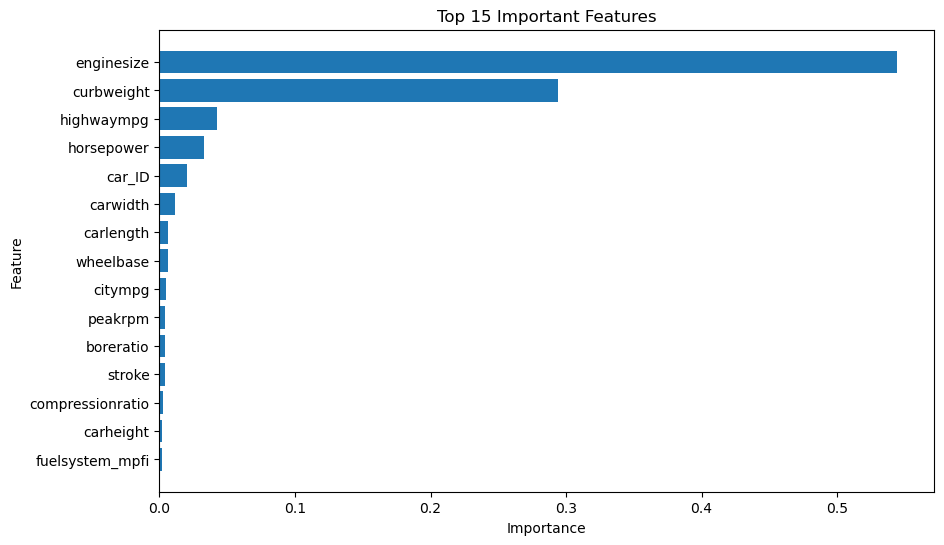

In [61]:
## feature importance analysis
## Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
feat_importance = pd.DataFrame({
    "Feature": X_final.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Show top 15 important features
print(feat_importance.head(15))

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_importance["Feature"].head(15), feat_importance["Importance"].head(15))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 15 Important Features")
plt.gca().invert_yaxis()
plt.show()

In [67]:
## hyper parametertuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize base model
rf = RandomForestRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

# Test set performance
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test R2 Score:", test_score)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\USER\anaconda3\Lib\site-packages\skl

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Score: 0.8887478984999453
Test R2 Score: 0.8747763560650353


here the R^2 score is less than random forest regression model.So the best model is random forest